In [1]:
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

## Extract data from dataset

### If the dataset has not been downloaded yet, download it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [2]:
fldr="C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace"

In [3]:
import os
files=os.listdir(fldr)

## Create list of images from dataset

In [4]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Age gender detector/data/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:/Users/admin/Desktop/Python Prog/Ag

## Create list of age and gender from the dataset

In [5]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## Viewing a sample

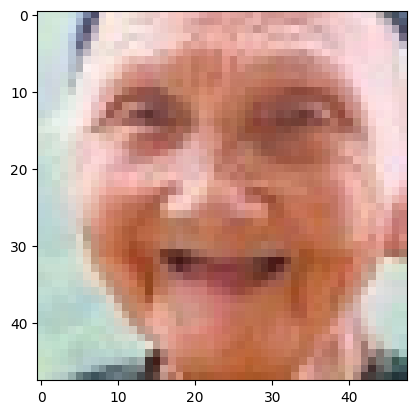

In [6]:
plt.imshow(images[12])

In [7]:
print(ages[12])

101


In [8]:
print(genders[12])

1


## Saving images array, ages array and genders array in the system (using numpy)

In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding the no.of Fale and Female samples respectively

In [11]:
values, counts=np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


## Plotting the no.of Male and Female samples

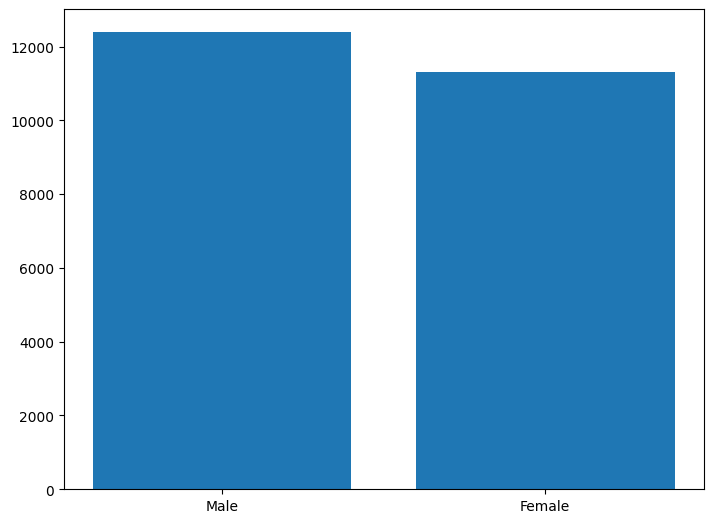

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male', 'Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding the no.of Samples in each Age

In [13]:
values, counts=np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting Age counts to list

In [14]:
val=values.tolist()
cnt=counts.tolist()

## Plotting the sample Age wise

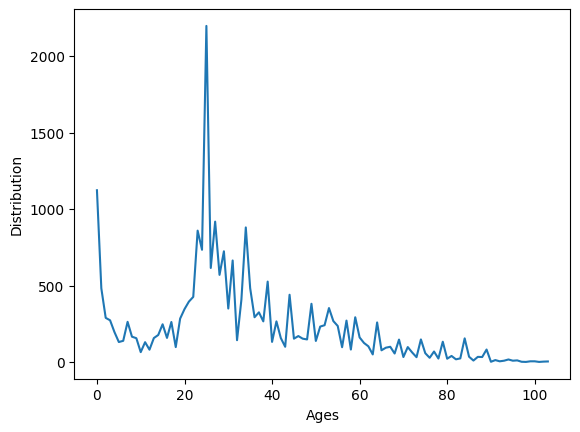

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()


## Defining labels for output

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating another list from the exixting one 
### For better understanding

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

## Splitting the dataset into test and train

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
Y_train[0:5]

array([[26,  0],
       [22,  1],
       [21,  0],
       [45,  0],
       [27,  0]])

## Splitting 'Y_test' and 'Y_train' further for better uderstanding

In [23]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([0, 1, 0, 0, 0])

In [25]:
Y_train_2[1][0:5]

array([26, 22, 21, 45, 27])

## Defining the Model

In [26]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, 
           kernel_size=(3, 3), 
           padding="same", 
           strides=(1, 1), 
           kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout (0.1)(x)
    x=Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs = Input((input_shape))
    # First Convolution Block
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    # Second Convolution Block
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    # Third Convolution Block
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    # Fourth Convolution Block
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    # Flatten and Dense Layers
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    # Dropout Layers
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    # Output Layers
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    # Define the Model
    model = Model(inputs=[inputs],outputs=[output_1, output_2])
    # Compile the Model
    # Example: 'accuracy' for the first output and 'precision' for the second output
    metrics = ['accuracy', 'accuracy']
    # Compile your model with the different metrics
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=metrics)
    return model

In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing The Model

In [31]:
fle_s= 'Age_Sex Detection.keras'
checkpoint=ModelCheckpoint(fle_s, monitor= 'val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode= 'auto' ,save_freq= 'epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor= 'val_loss', restore_best_weights=' True')
callback_list=[checkpoint, Early_stop]

## Running the Model

In [32]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - age_out_accuracy: 0.0443 - loss: 18.8547 - sex_out_accuracy: 0.5327
Epoch 1: val_loss improved from inf to 19.43651, saving model to Age_Sex Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - age_out_accuracy: 0.0443 - loss: 18.8480 - sex_out_accuracy: 0.5327 - val_age_out_accuracy: 0.0508 - val_loss: 19.4365 - val_sex_out_accuracy: 0.5220
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - age_out_accuracy: 0.0469 - loss: 14.7105 - sex_out_accuracy: 0.5582
Epoch 2: val_loss improved from 19.43651 to 14.14607, saving model to Age_Sex Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step - age_out_accuracy: 0.0468 - loss: 14.7074 - sex_out_accuracy: 0.5583 - val_age_out_accuracy: 0.0481 - val_loss: 14.1461 - val_sex_out_accuracy: 0.7130
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - age_out_accuracy: 0.0421 - loss: 11.9582 - sex_out_accuracy: 0.6871
Epoch 3: val_loss improved from 14.14607 to 11.071

## Model Evaluation

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - age_out_accuracy: 0.0526 - loss: 7.2615 - sex_out_accuracy: 0.8843


[7.389523029327393, 0.05078454688191414, 0.8842584490776062]

In [34]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [35]:
pred[1]

array([[21.237226 ],
       [ 2.2347913],
       [28.8549   ],
       ...,
       [52.222767 ],
       [ 2.0287087],
       [46.777218 ]], dtype=float32)

## Plotting Loss

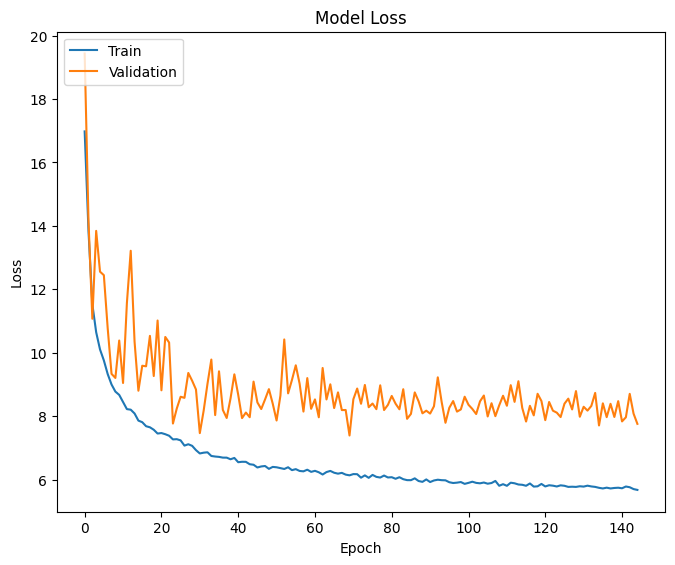

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Sex Accuracy

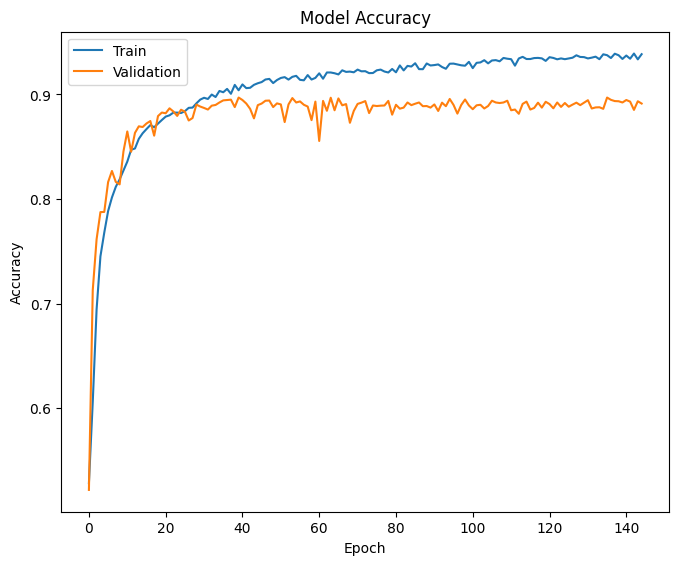

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

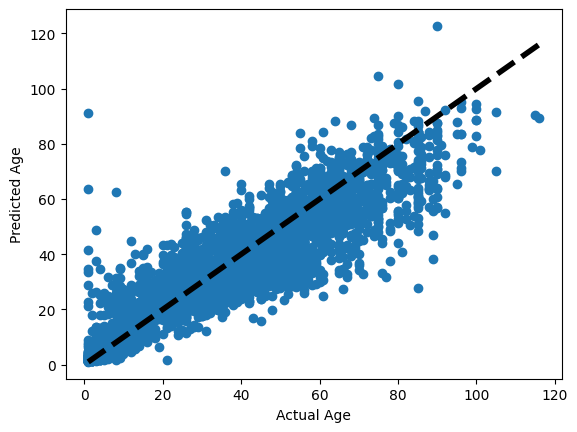

In [38]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making report of the Model(Gender only)

In [39]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\admin\AppData\Local\Temp\ipykernel_17224\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
report=classification_report(Y_test_2[0],Pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3094
           1       0.83      0.95      0.89      2833

    accuracy                           0.88      5927
   macro avg       0.89      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



## Making Heatmap of the Model(Gender only)

In [43]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

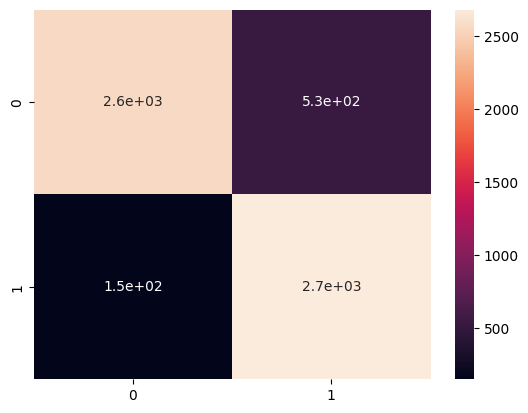

In [44]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing the Images ourself

In [45]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

Test-1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Age is 83
Predicted Gender is Female


C:\Users\admin\AppData\Local\Temp\ipykernel_17224\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_17224\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


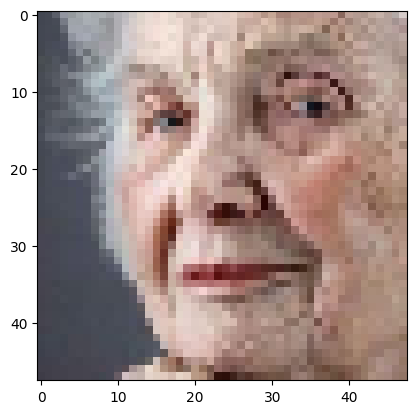

In [46]:
test_image(4,images_f,images_f_2,Model)

Test-2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is 9
Predicted Gender is Male


C:\Users\admin\AppData\Local\Temp\ipykernel_17224\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_17224\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


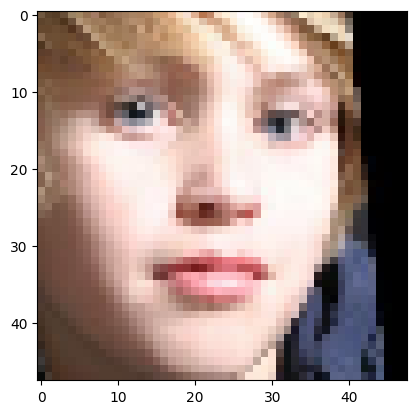

In [47]:
test_image(26,images_f,images_f_2,Model)